In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

df = pd.read_csv('netflix.csv')

print("Handling Remaining Null Values")
print("Original null counts:")
print(df.isnull().sum())

categorical_cols_with_nan = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']

for col in categorical_cols_with_nan:
    if col == 'director':
        df[col] = df[col].fillna('Unknown Director')
    elif col == 'cast':
        df[col] = df[col].fillna('Unknown Actor')
    elif col == 'country':
        df[col] = df[col].fillna('Unknown Country')
    elif col == 'date_added':
        df[col] = df[col].fillna('Unknown Date')
    elif col == 'rating':
        df[col] = df[col].fillna('Unknown Rating')
    elif col == 'duration':
        df[col] = df[col].fillna('Unknown Duration')

print("Null counts after handling:")
print(df.isnull().sum())

df['date_added_dt'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added_dt'] = df['date_added_dt'].fillna(df['date_added'])

df['release_date_approx'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01', errors='coerce')


Handling Remaining Null Values
Original null counts:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Null counts after handling:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              8807 non-null   object        
 1   type                 8807 non-null   object        
 2   title                8807 non-null   object        
 3   director             8807 non-null   object        
 4   cast                 8807 non-null   object        
 5   country              8807 non-null   object        
 6   date_added           8807 non-null   object        
 7   release_year         8807 non-null   int64         
 8   rating               8807 non-null   object        
 9   duration             8807 non-null   object        
 10  listed_in            8807 non-null   object        
 11  description          8807 non-null   object        
 12  date_added_dt        8807 non-null   object        
 13  release_date_approx  8807 non-nul

1. Categorical Variable Counts (Non-Graphical & Graphical)

Non-Graphical Analysis for: type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


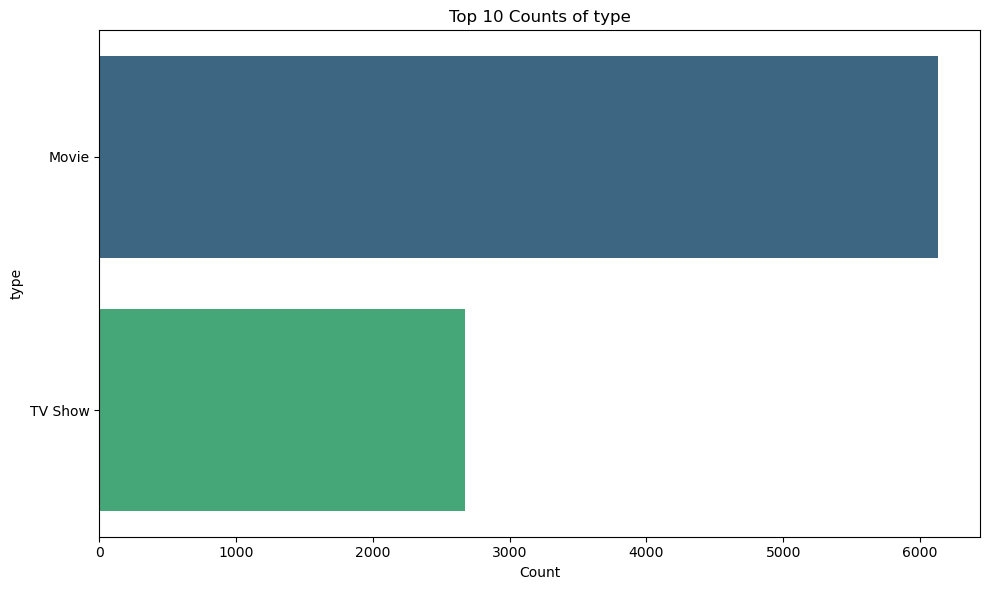


Non-Graphical Analysis for: director
director
Unknown Director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


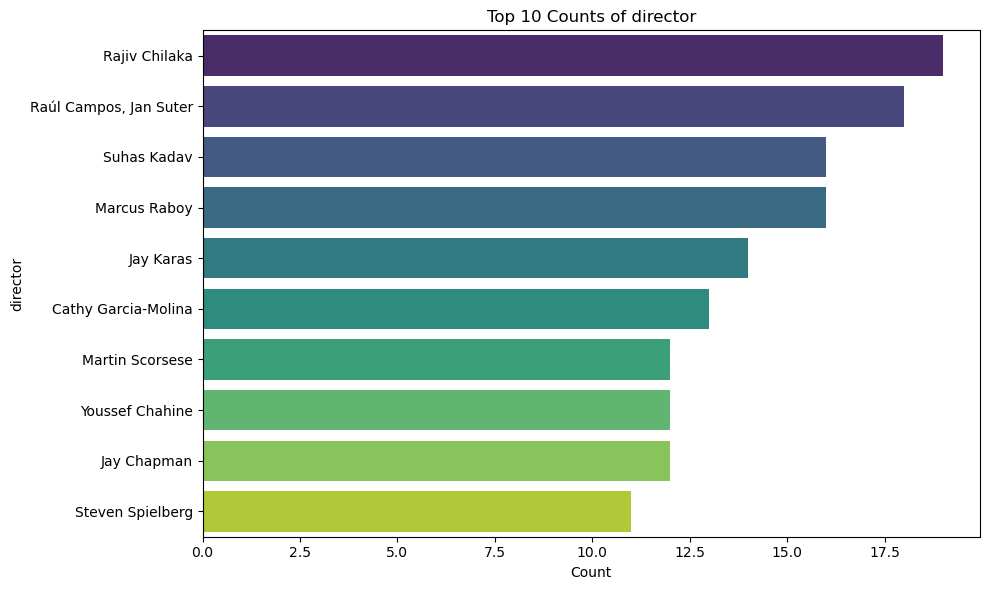


Non-Graphical Analysis for: cast
cast
Unknown Actor                                                                                                             825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Kevin Hart                                                                                                                  6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                   

C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


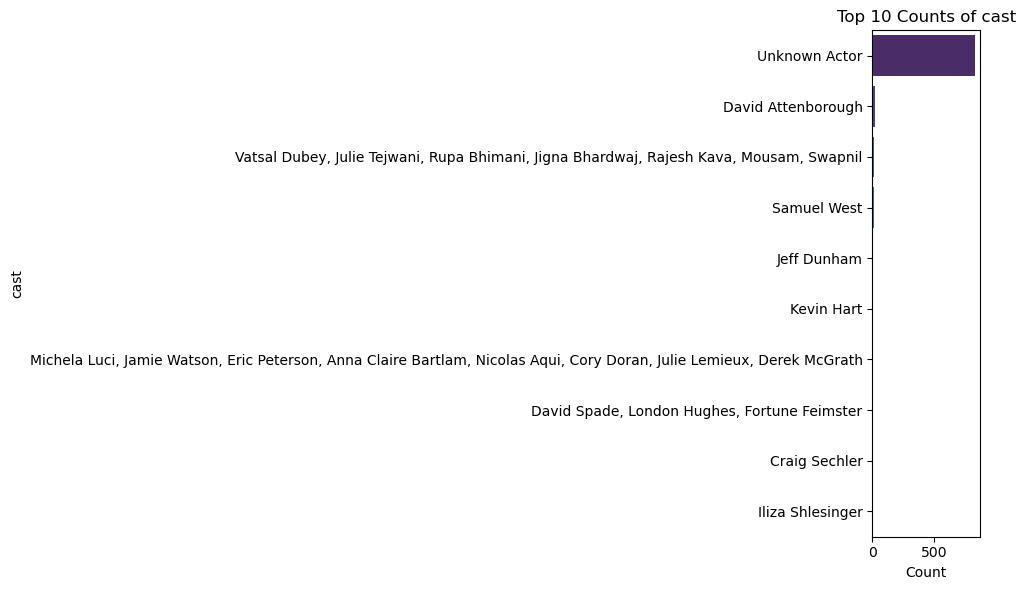


Non-Graphical Analysis for: country
country
United States      2818
India               972
Unknown Country     831
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


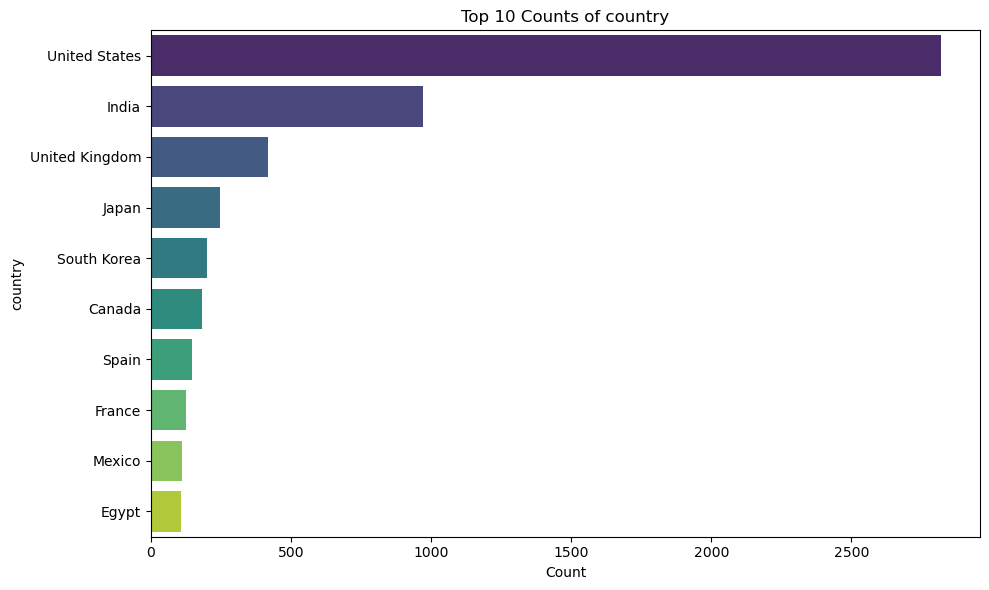


Non-Graphical Analysis for: rating
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


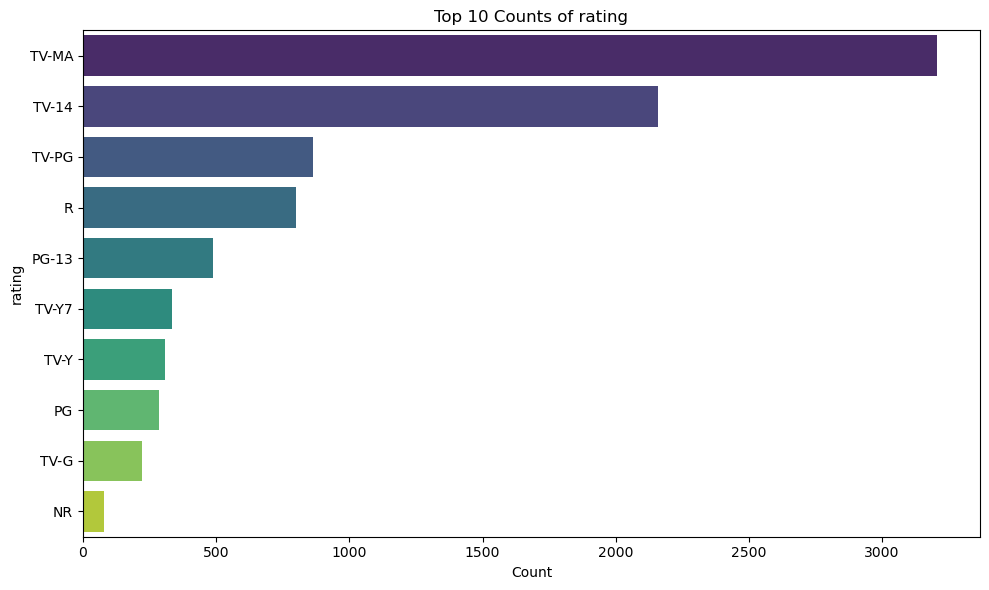


Non-Graphical Analysis for: duration
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


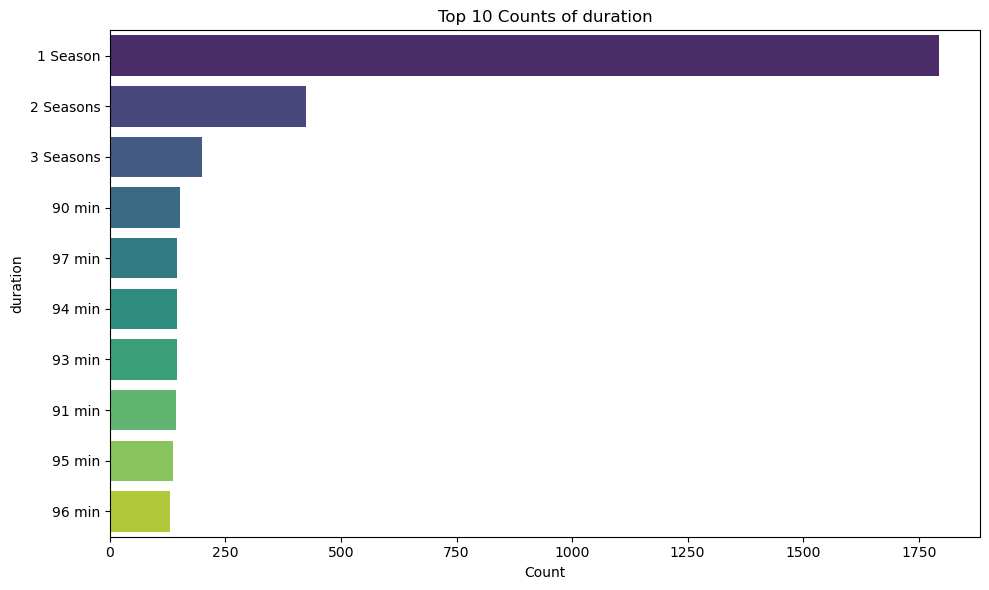


Non-Graphical Analysis for: listed_in
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2081129560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')


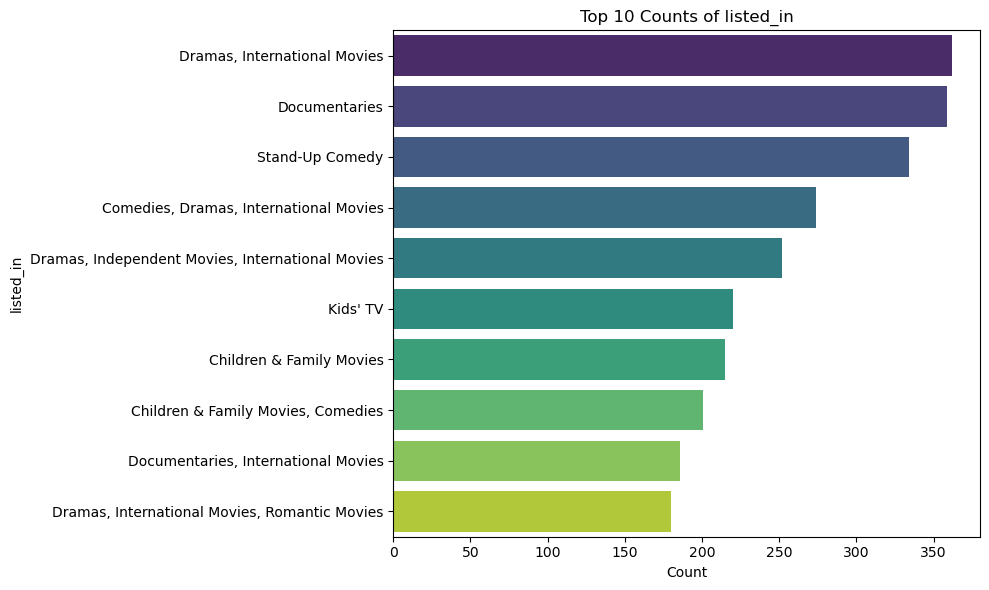

In [5]:

categorical_for_counts = ['type', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in']

print("1. Categorical Variable Counts (Non-Graphical & Graphical)")

for col in categorical_for_counts:
    print(f"\nNon-Graphical Analysis for: {col}")
    if 'Unknown' in df[col].unique():
        counts = df[df[col] != f'Unknown {col.replace("_", " ").title()}'][col].value_counts()
    else:
        counts = df[col].value_counts()
    
    print(counts.head(10))

    plt.figure(figsize=(10, 6))
    plot_data = df[df[col] != f'Unknown {col.replace("_", " ").title()}']
    if not plot_data.empty:
        sns.countplot(y=col, data=plot_data, order=plot_data[col].value_counts().index[:10], palette='viridis')
        plt.title(f'Top 10 Counts of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data to plot for {col} after excluding 'Unknown' categories.")

2. Comparison of TV Shows vs. Movies by Country

Top 10 Countries by Number of Unique Movies Produced:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Turkey              76
Name: title, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\583747749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_by_country.values, y=movies_by_country.index, palette='viridis')


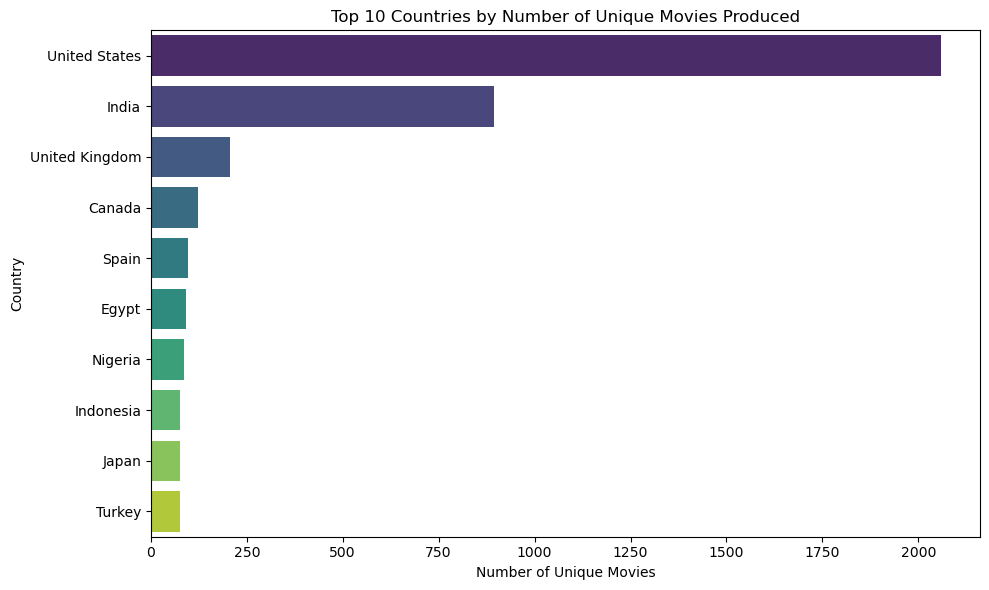


Top 10 Countries by Number of Unique TV Shows Produced:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\583747749.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tvshows_by_country.values, y=tvshows_by_country.index, palette='magma')


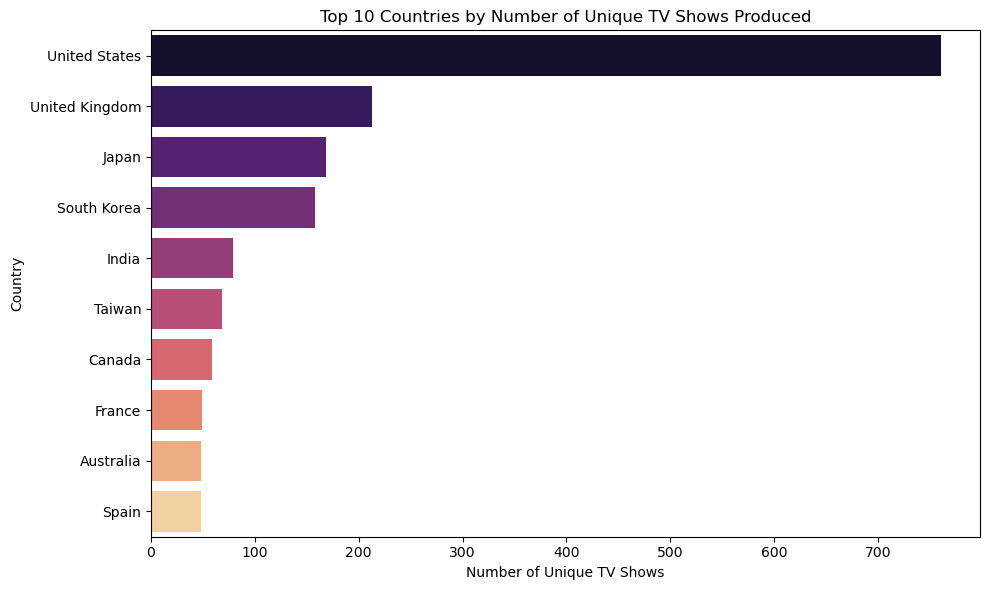

In [6]:
print("2. Comparison of TV Shows vs. Movies by Country")


movies_by_country = df[(df['type'] == 'Movie') & (df['country'] != 'Unknown Country')]\
                    .groupby('country')['title'].nunique().nlargest(10)
print("\nTop 10 Countries by Number of Unique Movies Produced:")
print(movies_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x=movies_by_country.values, y=movies_by_country.index, palette='viridis')
plt.title('Top 10 Countries by Number of Unique Movies Produced')
plt.xlabel('Number of Unique Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

tvshows_by_country = df[(df['type'] == 'TV Show') & (df['country'] != 'Unknown Country')]\
                     .groupby('country')['title'].nunique().nlargest(10)
print("\nTop 10 Countries by Number of Unique TV Shows Produced:")
print(tvshows_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x=tvshows_by_country.values, y=tvshows_by_country.index, palette='magma')
plt.title('Top 10 Countries by Number of Unique TV Shows Produced')
plt.xlabel('Number of Unique TV Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


--- 3. Best Time to Add Content to Netflix (by Date Added) ---

Number of Movies added per Month:
month_added
January      546
February     382
March        529
April        550
May          439
June         492
July         565
August       519
September    519
October      545
November     498
December     547
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\224975523.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_by_month.index, y=movies_by_month.values, palette='viridis')


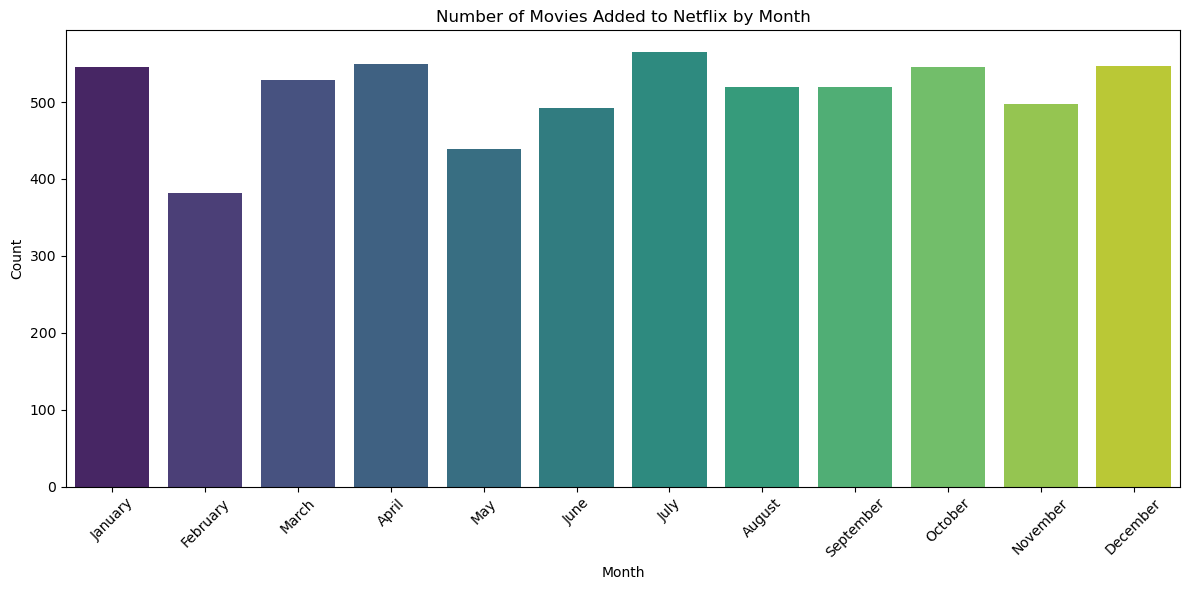


Number of TV Shows added per Month:
month_added
January      192
February     181
March        213
April        214
May          193
June         236
July         262
August       236
September    251
October      215
November     207
December     266
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\224975523.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tvshows_by_month.index, y=tvshows_by_month.values, palette='magma')


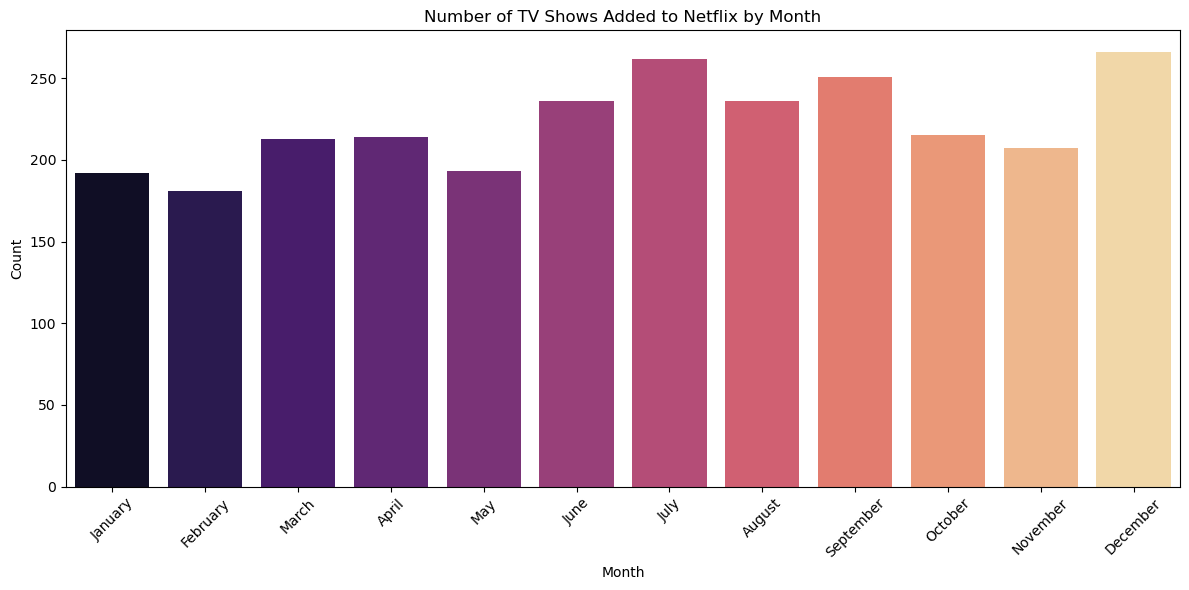


Top 10 Weeks for Movies Added to Netflix:
week_added
1     316
9     207
13    174
18    173
26    195
27    154
31    185
35    189
40    215
44    243
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\224975523.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_by_week.index, y=movies_by_week.values, palette='viridis')


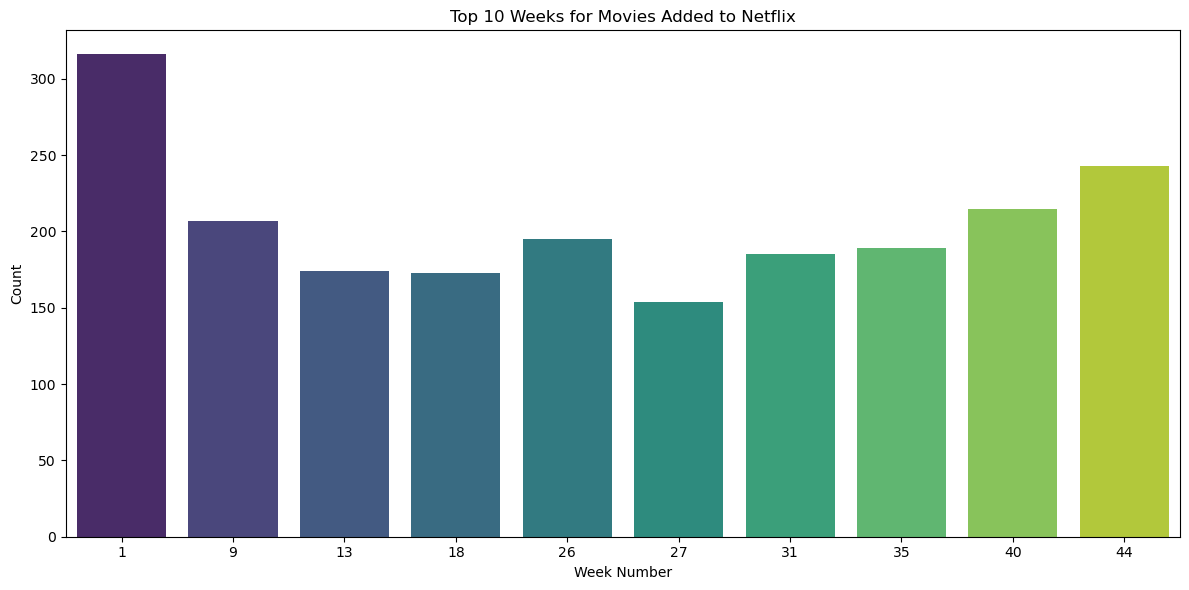


Top 10 Weeks for TV Shows Added to Netflix:
week_added
5     73
13    76
24    75
26    73
27    86
31    83
35    74
40    72
44    75
50    70
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\224975523.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tvshows_by_week.index, y=tvshows_by_week.values, palette='magma')


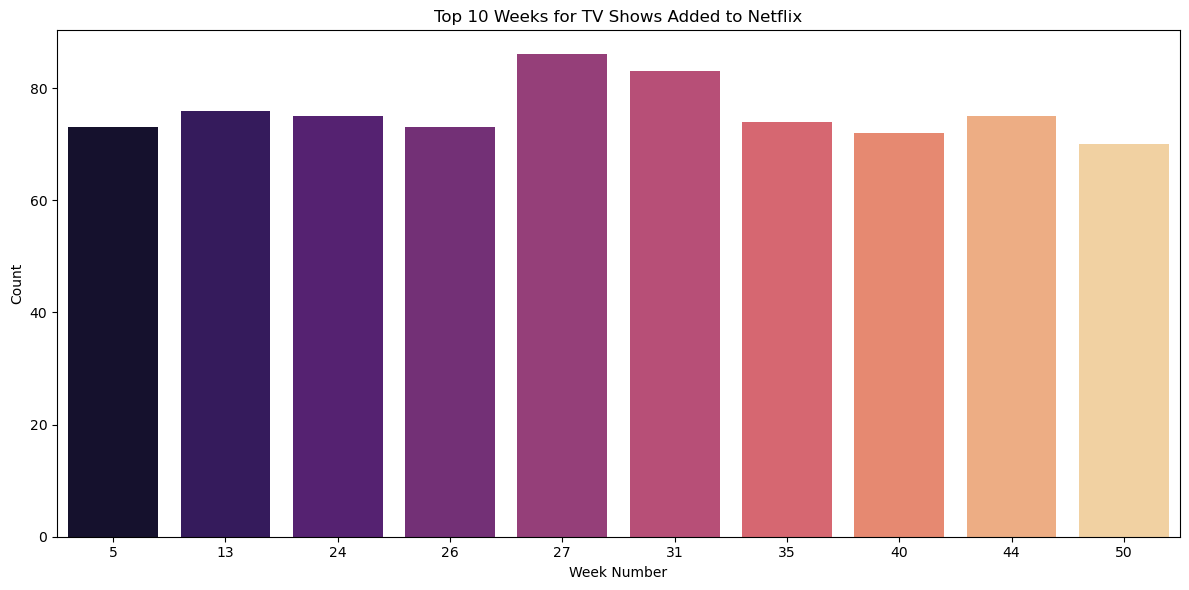

In [7]:
print("\n--- 3. Best Time to Add Content to Netflix (by Date Added) ---")


df_valid_dates = df[df['date_added_dt'] != 'Unknown Date'].copy()

df_valid_dates['date_added_dt'] = pd.to_datetime(df_valid_dates['date_added_dt'])

df_valid_dates['month_added'] = df_valid_dates['date_added_dt'].dt.month_name()
df_valid_dates['week_added'] = df_valid_dates['date_added_dt'].dt.isocalendar().week.astype(int)


movies_by_month = df_valid_dates[df_valid_dates['type'] == 'Movie']['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).fillna(0)
print("\nNumber of Movies added per Month:")
print(movies_by_month)

plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_month.index, y=movies_by_month.values, palette='viridis')
plt.title('Number of Movies Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tvshows_by_month = df_valid_dates[df_valid_dates['type'] == 'TV Show']['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).fillna(0)
print("\nNumber of TV Shows added per Month:")
print(tvshows_by_month)

plt.figure(figsize=(12, 6))
sns.barplot(x=tvshows_by_month.index, y=tvshows_by_month.values, palette='magma')
plt.title('Number of TV Shows Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

movies_by_week = df_valid_dates[df_valid_dates['type'] == 'Movie']['week_added'].value_counts().nlargest(10).sort_index()
print("\nTop 10 Weeks for Movies Added to Netflix:")
print(movies_by_week)

plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_week.index, y=movies_by_week.values, palette='viridis')
plt.title('Top 10 Weeks for Movies Added to Netflix')
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

tvshows_by_week = df_valid_dates[df_valid_dates['type'] == 'TV Show']['week_added'].value_counts().nlargest(10).sort_index()
print("\nTop 10 Weeks for TV Shows Added to Netflix:")
print(tvshows_by_week)

plt.figure(figsize=(12, 6))
sns.barplot(x=tvshows_by_week.index, y=tvshows_by_week.values, palette='magma')
plt.title('Top 10 Weeks for TV Shows Added to Netflix')
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

4. Analysis of Top Actors and Directors

Top 10 Directors by Number of Titles:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\4088256718.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')


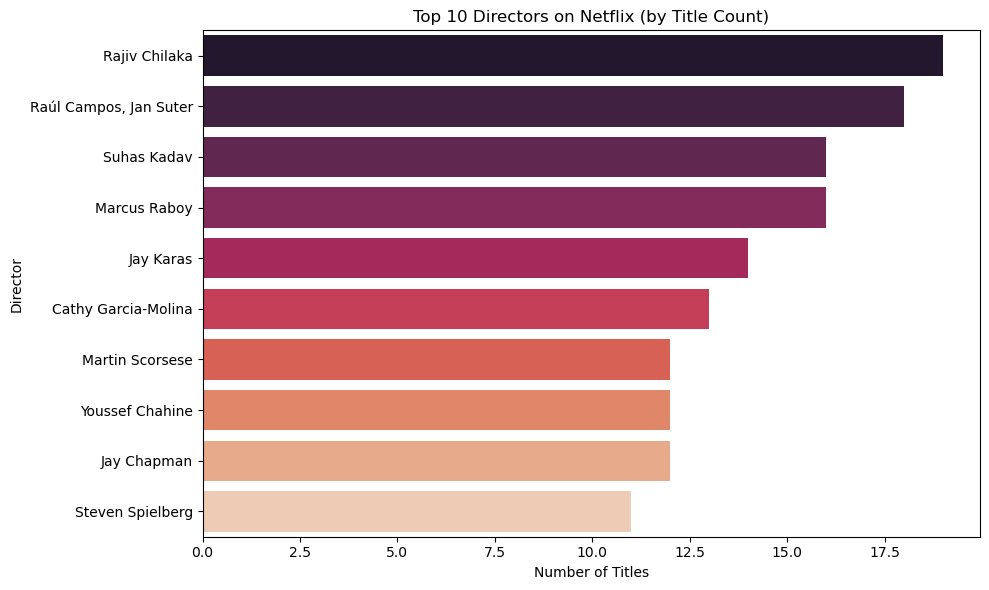


Top 10 Actors by Number of Titles:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Kevin Hart                                                                                                                 6
David Spade, London Hughes, Fortune Feimster                                                                               6
Craig Sechler                                                                       

C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\4088256718.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')


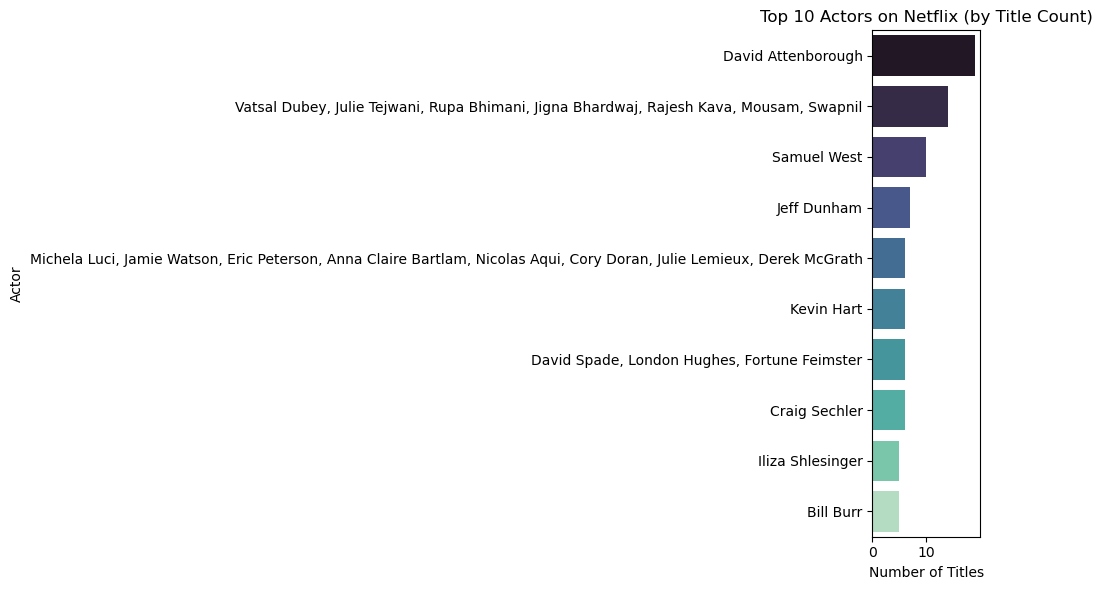

In [8]:
print("4. Analysis of Top Actors and Directors")

top_directors = df[df['director'] != 'Unknown Director']['director'].value_counts().nlargest(10)
print("\nTop 10 Directors by Number of Titles:")
print(top_directors)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title('Top 10 Directors on Netflix (by Title Count)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

top_actors = df[df['cast'] != 'Unknown Actor']['cast'].value_counts().nlargest(10)
print("\nTop 10 Actors by Number of Titles:")
print(top_actors)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')
plt.title('Top 10 Actors on Netflix (by Title Count)')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

5. Most Popular Genres


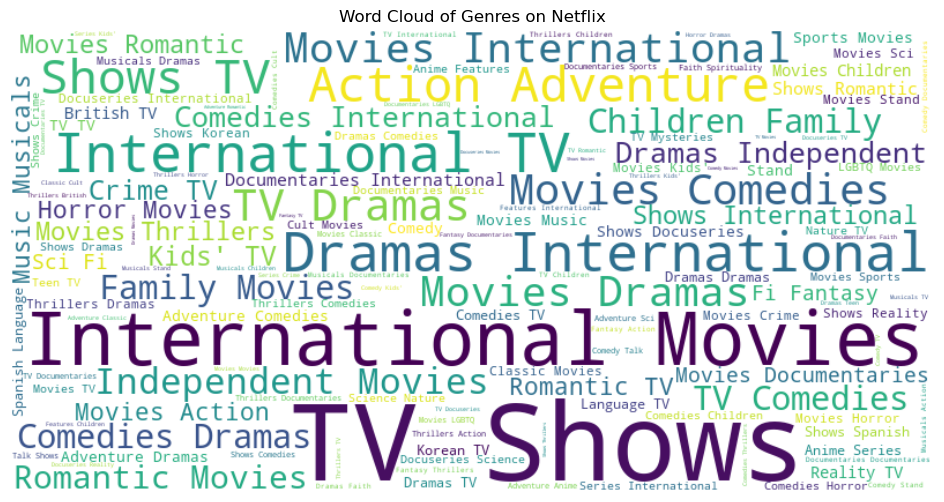

In [9]:
print("5. Most Popular Genres")

all_genres = ' '.join(df[df['listed_in'] != 'Unknown Genre']['listed_in'].dropna().tolist())

if all_genres: 
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Genres on Netflix')
    plt.show()
else:
    print("No genres available for word cloud after excluding 'Unknown Genre'.")

6. Time between Movie Release and Netflix Addition

The most common time (mode) for a movie to be added to Netflix after its release is: 334 days.
This insight suggests that generally, Netflix adds movies around this many days after their initial release.


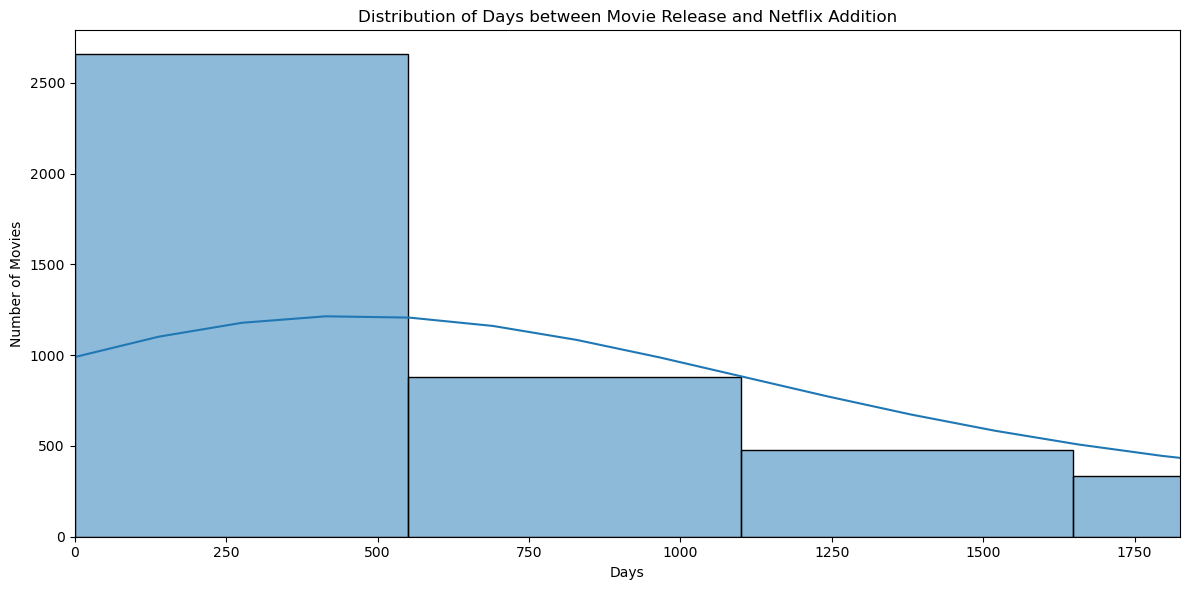

In [10]:
print("6. Time between Movie Release and Netflix Addition")

df_movies_dates = df[(df['type'] == 'Movie') &
                     (df['date_added_dt'].notna()) &
                     (df['date_added_dt'] != 'Unknown Date')].copy()

df_movies_dates['date_added_dt'] = pd.to_datetime(df_movies_dates['date_added_dt'])

df_movies_dates['days_to_add'] = (df_movies_dates['date_added_dt'] - df_movies_dates['release_date_approx']).dt.days

df_movies_dates_valid_diff = df_movies_dates[df_movies_dates['days_to_add'] >= 0].copy()
df_movies_dates_valid_diff = df_movies_dates_valid_diff.dropna(subset=['days_to_add'])

if not df_movies_dates_valid_diff.empty:
    mode_days_to_add = df_movies_dates_valid_diff['days_to_add'].mode()[0]
    print(f"\nThe most common time (mode) for a movie to be added to Netflix after its release is: {mode_days_to_add} days.")
    print("This insight suggests that generally, Netflix adds movies around this many days after their initial release.")

    plt.figure(figsize=(12, 6))
    sns.histplot(df_movies_dates_valid_diff['days_to_add'], bins=50, kde=True)
    plt.title('Distribution of Days between Movie Release and Netflix Addition')
    plt.xlabel('Days')
    plt.ylabel('Number of Movies')
    plt.xlim(0, 365 * 5)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough valid data to calculate the time between movie release and Netflix addition.")